# Week 6 - Linear Regression (Boston)

The Boston data contains 14 columns:
* **crim**: per capita crime rate by town
* **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
* **indus**: proportion of non-retail business acres per town.
* **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* **nox**: nitrogen oxides concentration (parts per 10 million).
* **rm**: average number of rooms per dwelling.
* **age**: proportion of owner-occupied units built prior to 1940.
* **dis**: weighted mean of distances to five Boston employment centres.
* **rad**: index of accessibility to radial highways.
* **tax**: full-value property-tax rate per \$10,000.
* **ptratio**: pupil-teacher ratio by town.
* **black**: $1000(Bk−0.63)^2$ where Bk is the proportion of blacks by town.
* **lstat**: lower status of the population (percent).
* **medv**: median value of owner-occupied homes in \$1,000s.

In [2]:
# Clear the workspace
rm(list=ls())

# Load the relevant packages
library('tidyverse')
library('MASS') # Access datasets from the MASS library (Modern Applied Statistics with S)

head(Boston, 3)
glimpse(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


Observations: 506
Variables: 14
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.088...
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5...
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87,...
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.5...
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.6...
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9...
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9...
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4,...
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311,...
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2,...
$ black   <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396...
$ lstat   <dbl> 4.98

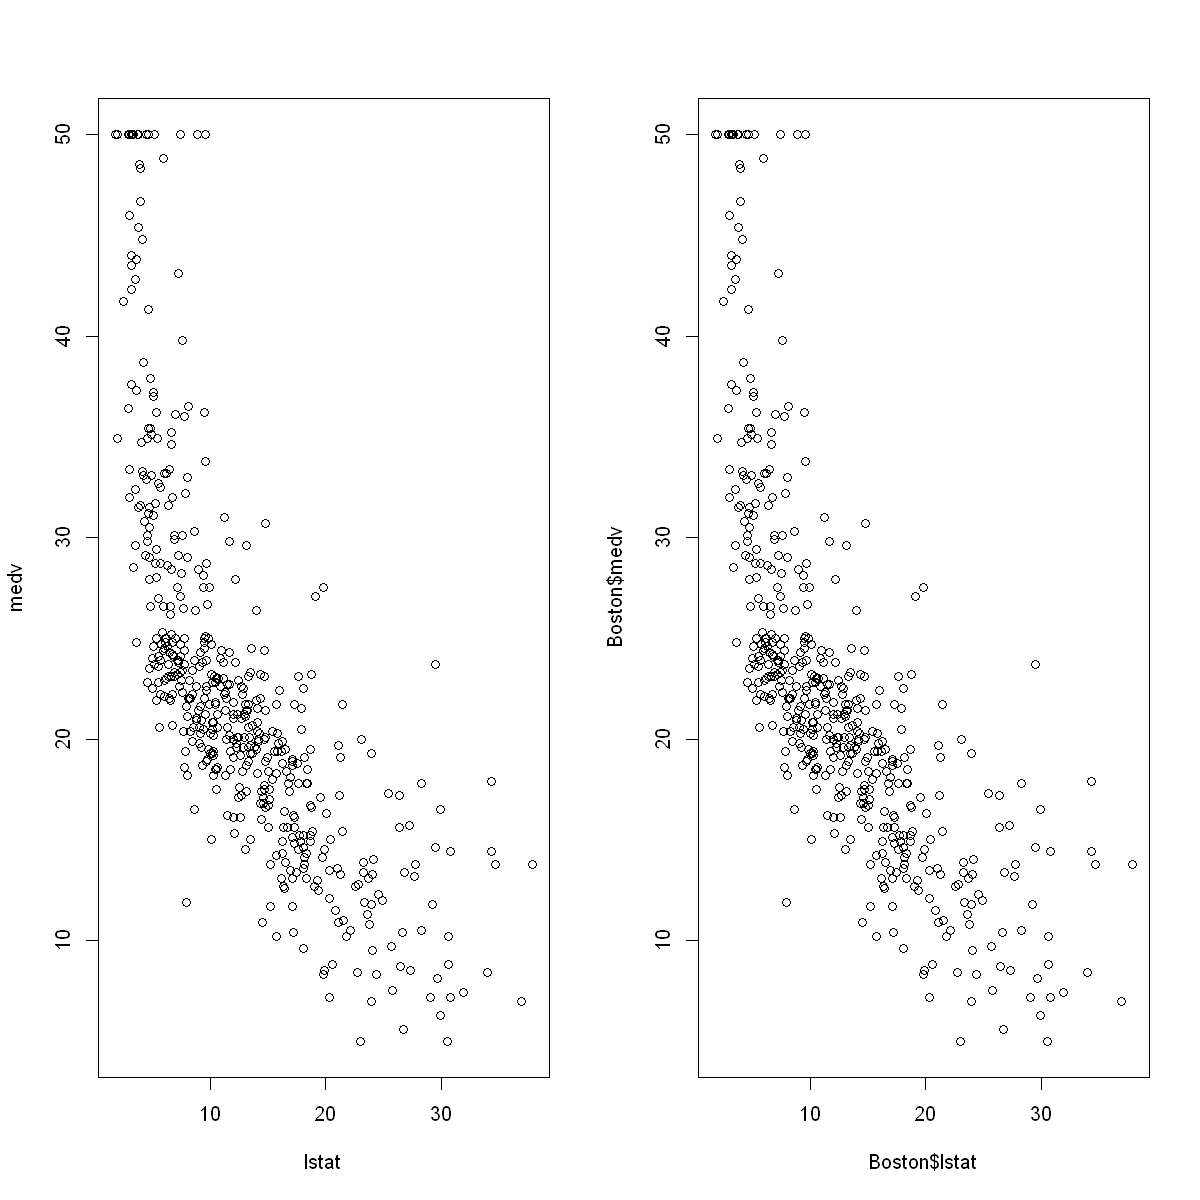

In [3]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,2))
plot(medv ~ lstat, Boston)
plot(Boston$lstat, Boston$medv)

## Model 1

Since this is the first model, I'll run each code separately so you can see it's corresponding output.

In [4]:
model1 <- lm(medv ~ lstat, data=Boston)
model1


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [5]:
summary(model1)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


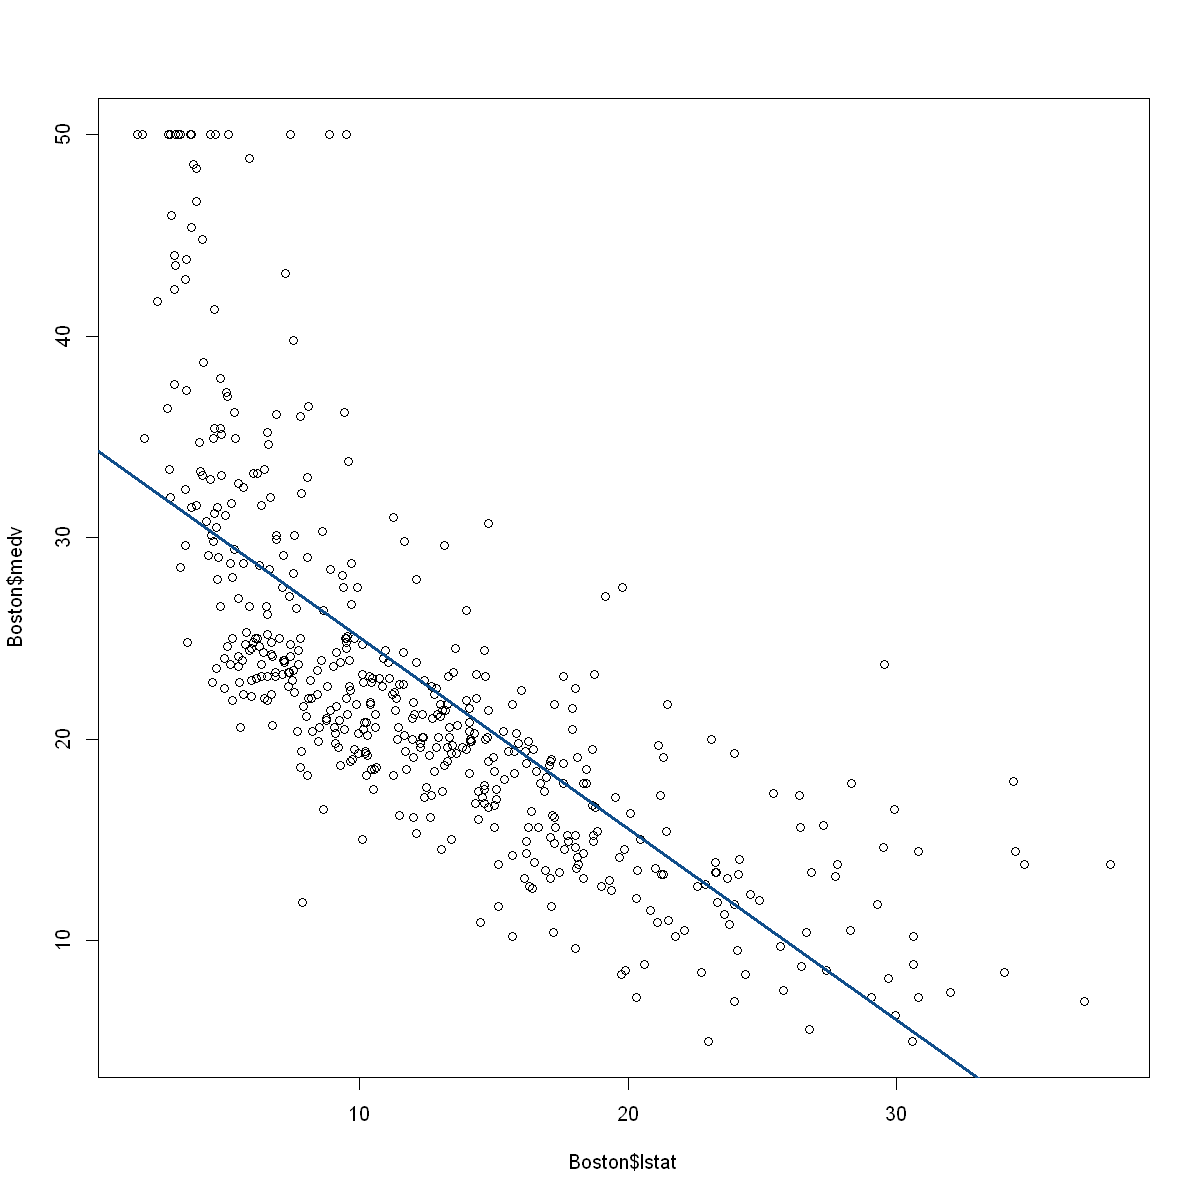

In [6]:
plot(Boston$lstat, Boston$medv)
abline(model1, col='dodgerblue4', lwd=3)

The following are 'functions' of `model1`, so they can be called like `model1$coefficients`.

In [7]:
names(model1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [8]:
confint(model1)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


What no resource explains is that `data.frame(lstat=c(5,10,15))` creates a dataframe with one column called `lstat` with values 5, 10, 15. It is these values that are used to predict given the model formula: $medv = 34.55 - 0.95 \times lstat$

In [9]:
predict(model1, data.frame(lstat=c(5,10,15)), interval='confidence')

fit,lwr,upr
29.80359,29.00741,30.59978
25.05335,24.47413,25.63256
20.30310,19.73159,20.87461


## Model 2

In [10]:
model2 <- lm(medv ~ lstat + age, data=Boston)
summary(model2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


We verify the $p$-value of the `age` predictor.

In [11]:
2 * (1 - pt(2.826, 506-3))

[1] 0.004900824

We verify the $R^2$ value. Recall that the formula is given by:

$$R^2 = 1 - \frac{\sum{(y_i-\hat{y}_i)^2}}{\sum{(y_i - \bar{y})^2}} = 1- \frac{SS_{res}}{SS_{tot}} = \frac{SS_{reg}}{SS_{tot}}$$

In [12]:
ss.res = sum((Boston$medv - fitted(model2))^2)
ss.tot = sum((Boston$medv-mean(Boston$medv))^2)
r2 = 1 - ss.res/ss.tot
r2 %>% round(4)

[1] 0.5513

We verify the adjusted $R^2$ value. Recall that the formula is given by:

$$Adjusted R^2 = 1 - \frac{(1-R^2)(N-1)}{N-p-1}$$

where,
* $p$ is the number of predictors
* $N$ is the total sample size

In [13]:
N = nrow(Boston)
p = length(coef(model2)) - 1
adjusted.r2 = 1 - (1-r2)*(N-1) / (N-p-1)
adjusted.r2 %>% round(4)

[1] 0.5495

## Model 3


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

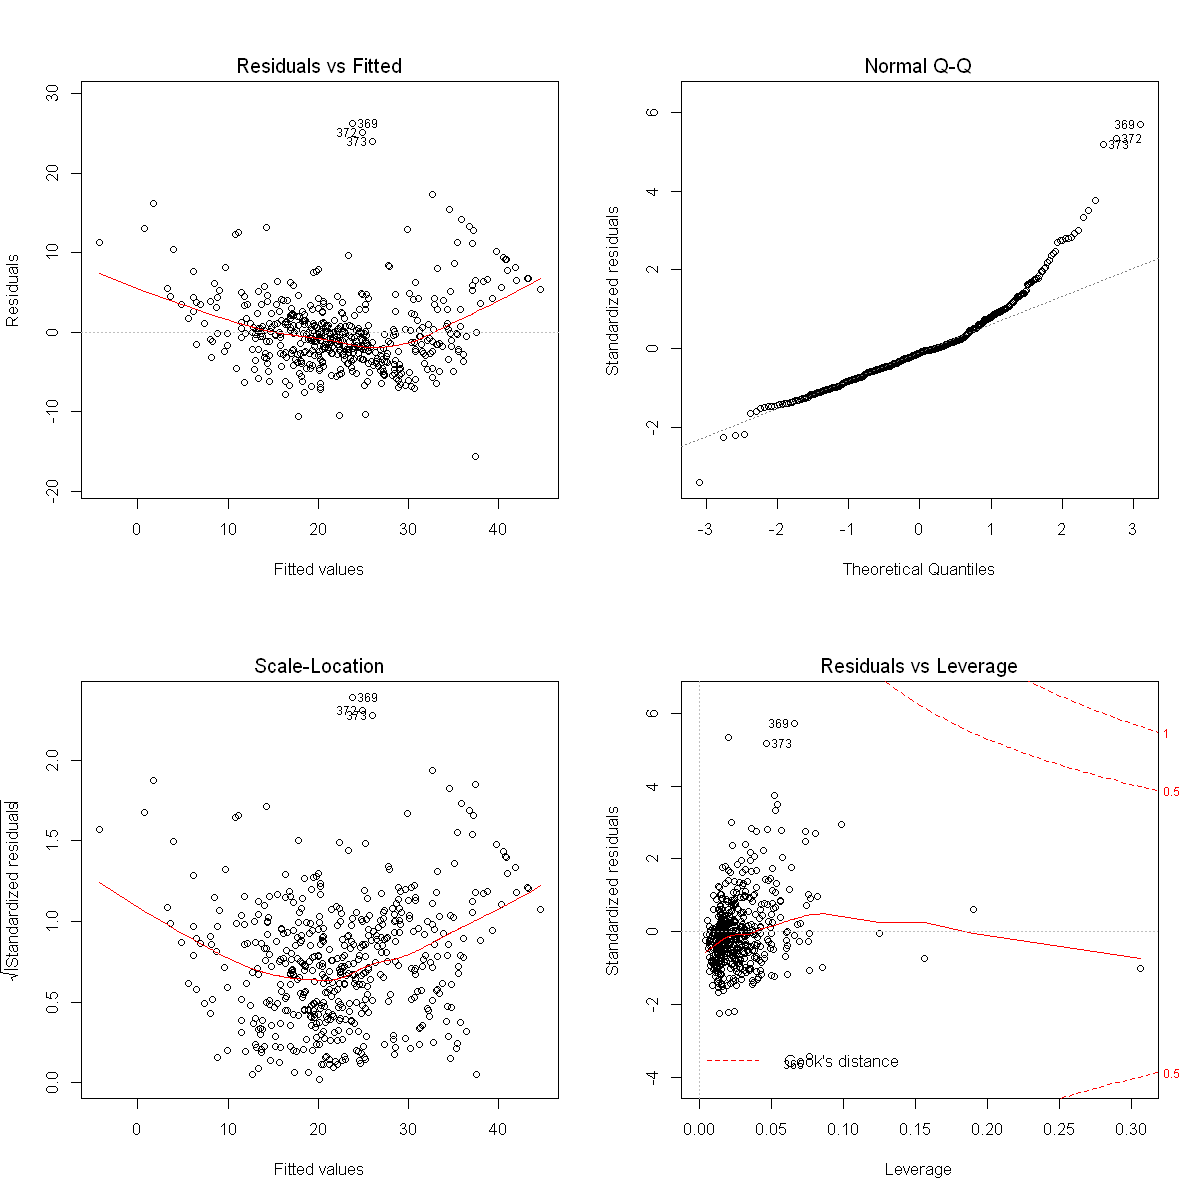

In [14]:
model3 <- lm(medv ~., data=Boston)
summary(model3)

par(mfrow=c(2,2))
plot(model3)

## Model 4

Below is how we `update()` a model and exclude predictors. We remove `age` and `indus` as they were not significant. This leaves us with all the variables that are significant.

In [15]:
model4 <- update(model3, ~. - age - indus)
summary(model4)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*

## Model 5

Now, let's look at interactions. When modelling interaction effects, you can choose to explicitly specify the predictors if you like. However, the main effects are automatically included. 

In [16]:
model5 <- lm(medv ~ lstat*age, data=Boston)
summary(model5)


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


## Model 6

Note that `I()` isolates or insulates its contents from the gaze of R's formula parsing code. Without it, R would interpret it literally (by adding it) and we would only have the one predictor A good explanation can be found [here](https://stackoverflow.com/questions/24192428/what-does-the-capital-letter-i-in-r-linear-regression-formula-mean).

In [17]:
model6 <- lm(medv ~ lstat + I(lstat^2), data=Boston)
summary(model6)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


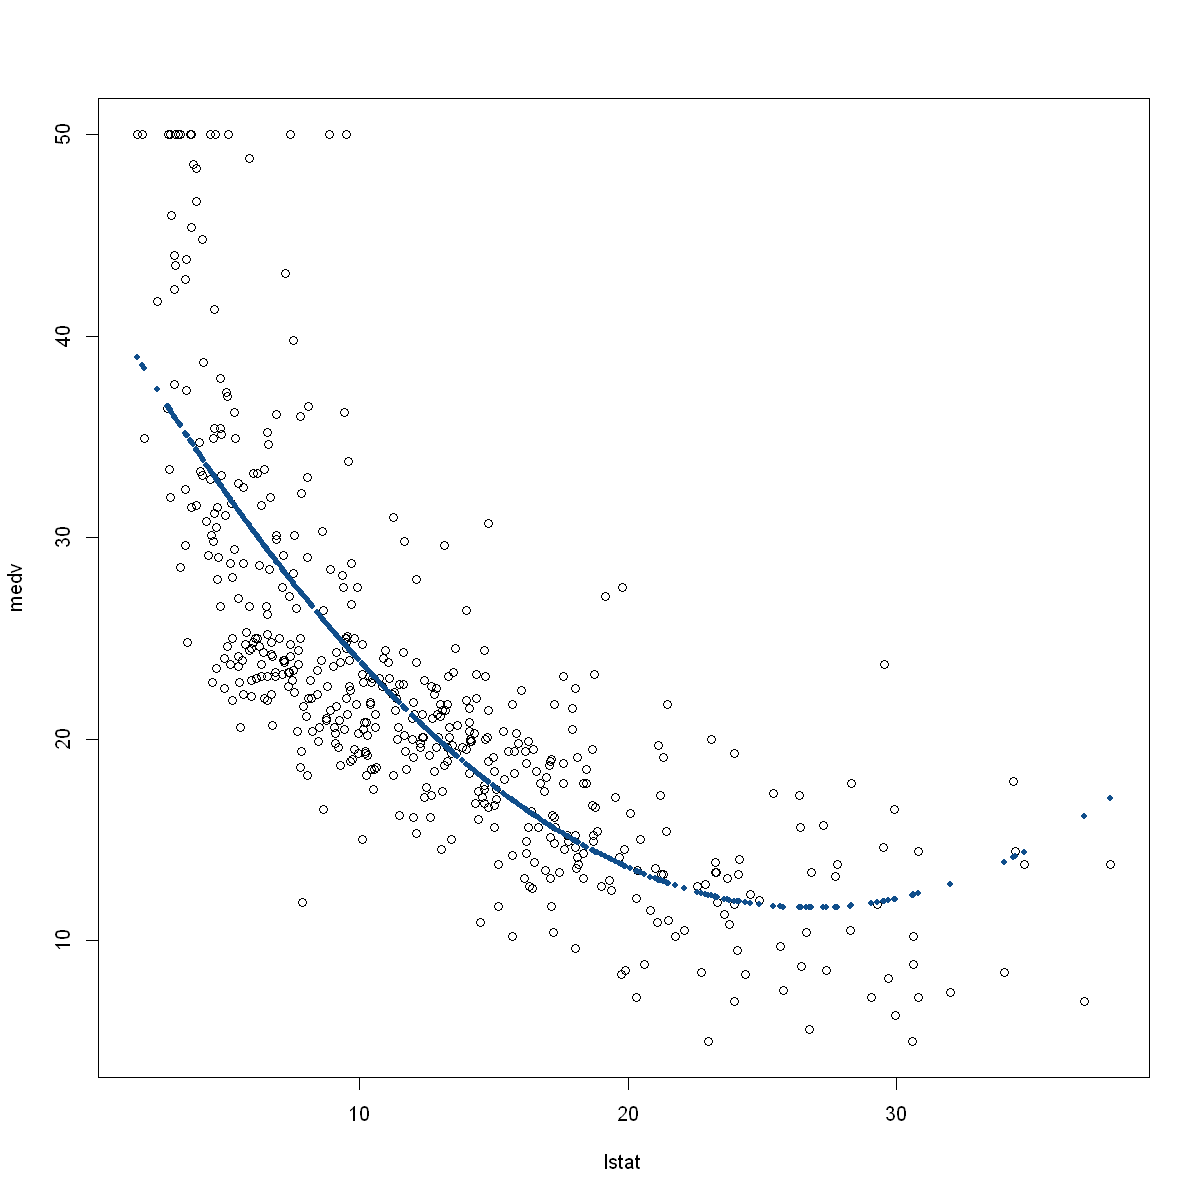

In [18]:
attach(Boston) # This makes the column names available as variables
plot(medv~lstat)
points(lstat, fitted(model6), col='dodgerblue4', pch=20)

## Model 7

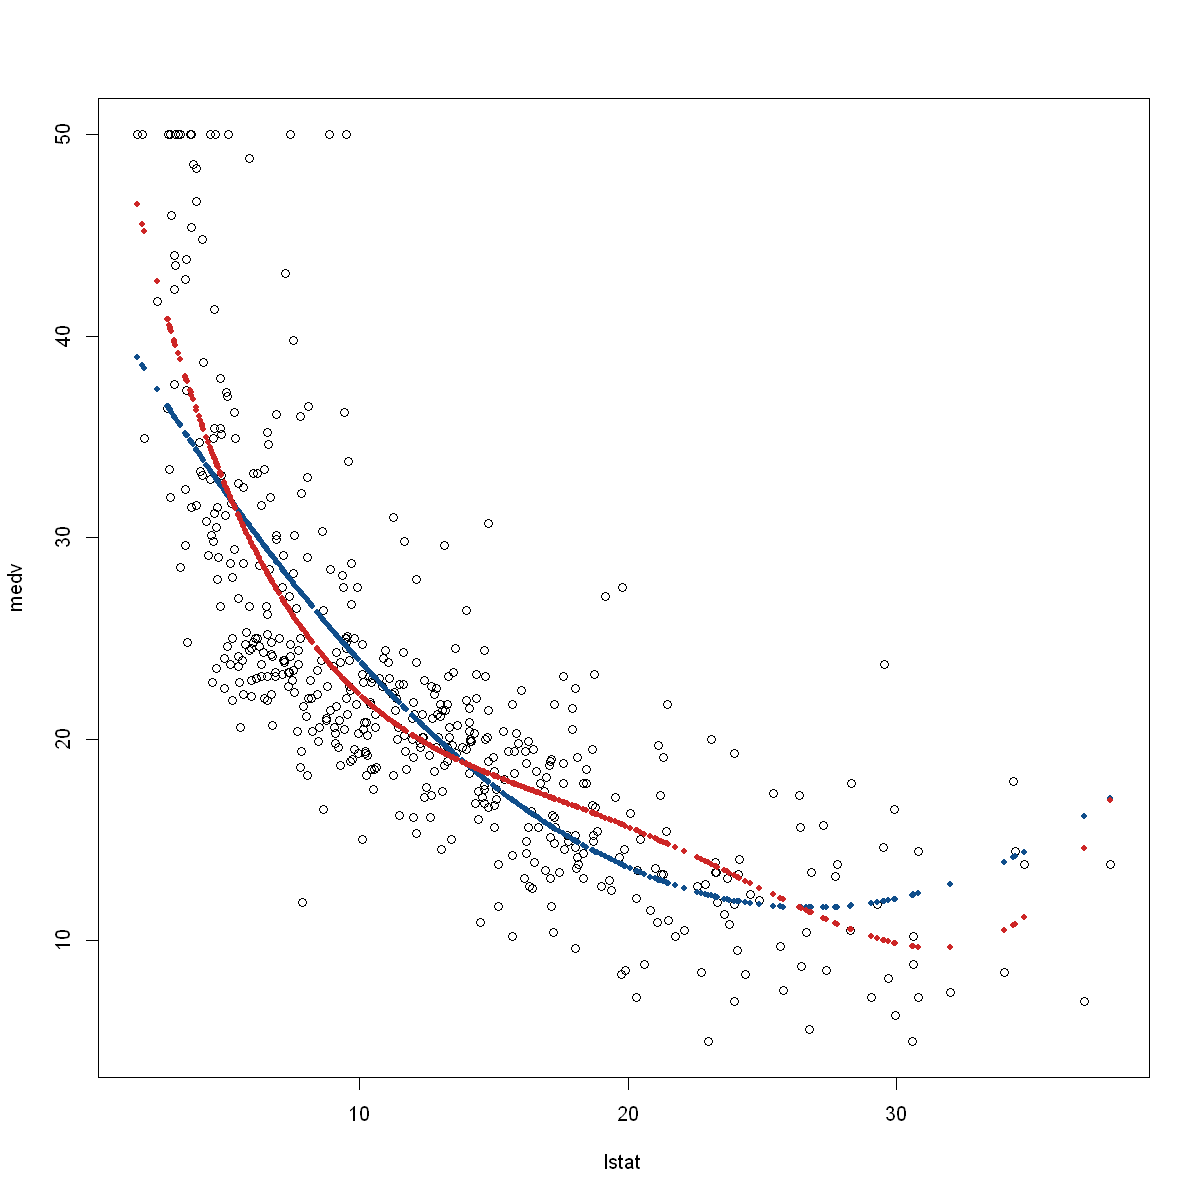

In [19]:
model7 <- lm(medv ~ poly(lstat, 4))
plot(medv ~ lstat)
points(lstat, fitted(model6), col='dodgerblue4', pch=20)
points(lstat, fitted(model7), col='firebrick3', pch=20)

## All plotting symbols

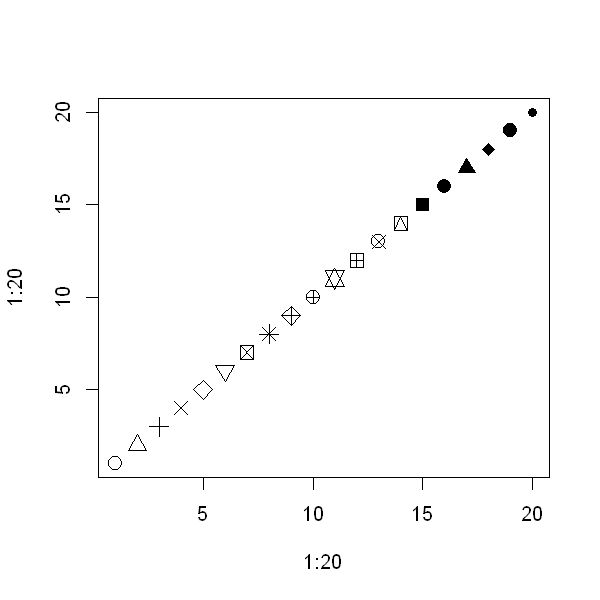

In [20]:
options(repr.plot.width=5, repr.plot.height=5)
plot(1:20, 1:20, pch=1:20, cex=1.5)

## Resources
* [What does I() mean in linear regression](https://stackoverflow.com/questions/24192428/what-does-the-capital-letter-i-in-r-linear-regression-formula-mean)